In [14]:
from sklearn import datasets
from sklearn.datasets import load_iris
from mpl_toolkits.mplot3d import Axes3D # 3차원 시각화
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sb 
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
import matplotlib.pyplot as plt

In [3]:
iris = load_iris()

In [6]:
irisDF = pd.DataFrame(iris['data'],columns = iris['feature_names'])
irisDF.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
color=[]
for n in iris.target:
    if n==0:
        color.append('r')
    elif n==1:
        color.append('g')
    else:
        color.append('b')

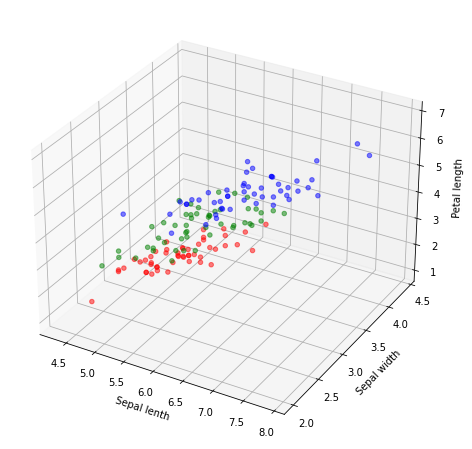

In [14]:
fig = plt.figure(figsize=(10,8))
ax = fig.gca(projection ='3d')
ax.scatter(irisDF['sepal length (cm)'],irisDF['sepal width (cm)'],
           irisDF['petal length (cm)'], alpha = 0.5,c=color)

ax.set_xlabel('Sepal lenth')
ax.set_ylabel('Sepal width')
ax.set_zlabel('Petal length')
plt.show()

## 피쳐 선택
- 행렬에서 차이가 변화 폭이 가장 큰 2개의 열을 대표 피쳐로 사용하는 방식

## 피쳐 추출 
- 원본 데이터와 전혀 다른 형태의 데이터를 추출한다.
ex) [7,1,2] => [3,4]

In [15]:
model_pipe = make_pipeline(StandardScaler(), PCA())
model_pipe.fit(irisDF)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('pca',
                 PCA(copy=True, iterated_power='auto', n_components=None,
                     random_state=None, svd_solver='auto', tol=0.0,
                     whiten=False))],
         verbose=False)

In [22]:
model = PCA(n_components=2) # 2차원으로 차원축소
pcaf  = model.fit_transform(irisDF)

In [23]:
pcaf.shape

(150, 2)

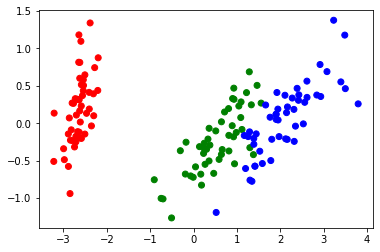

In [29]:
plt.scatter(pcaf[:,0],pcaf[:,1], c=color)
plt.show()

In [36]:
pcadf = pd.DataFrame(pcaf, columns=['x','y'])
pcadf['target'] = iris['target']
pcadf.head()

,x,y,target
0,-2.684126,0.319397,0
1,-2.714142,-0.177001,0
2,-2.888991,-0.144949,0
3,-2.745343,-0.318299,0
4,-2.728717,0.326755,0


In [37]:
import seaborn as sb

[]

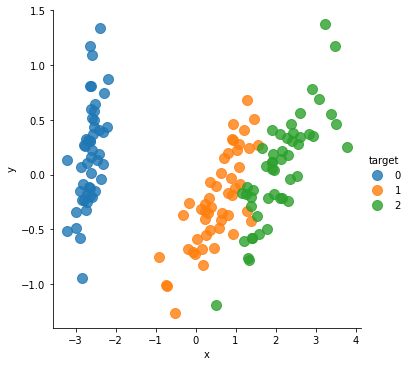

In [38]:
# 회귀선 출력 plot
sb.lmplot(x='x', y='y', data=pcadf, fit_reg=False, 
          hue='target', scatter_kws={'s':100})
plt.plot()

### 1차원으로 확인

In [43]:
model1 = PCA(n_components=1) # 1차원으로 차원축소
pcaf1  = model1.fit_transform(irisDF)
pcaf1.shape

(150, 1)

In [44]:
pcaf1.max()

3.7956454220728846

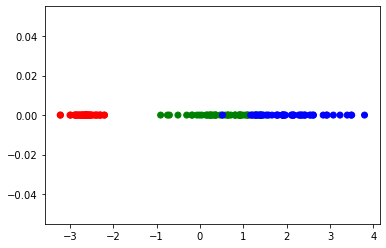

In [48]:
xf = pcaf1[:,0]
yf = len(xf)*[0]
plt.scatter( xf, yf , c= color)
plt.show()

## 연습문제 
- wine 데이터셋을 2차원으로 차원축소 후 분류를 확인하시오.

In [1]:
from sklearn.datasets import load_wine

In [2]:
wine = load_wine()

In [5]:
wineDF = pd.DataFrame(wine['data'],columns = wine['feature_names'])
wineDF.head()

,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0


In [6]:
color=[]
for n in wine.target:
    if n==0:
        color.append('r')
    elif n==1:
        color.append('g')
    else:
        color.append('b')

In [8]:
model_wine = PCA(n_components=2) # 2차원으로 차원축소
pcaf_wine  = model_wine.fit_transform(wineDF)

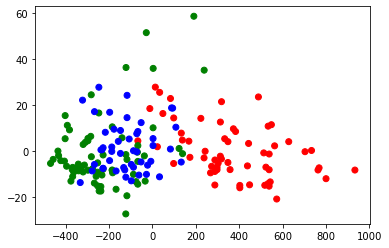

In [9]:
plt.scatter(pcaf_wine[:,0],pcaf_wine[:,1], c=color)
plt.show()

In [12]:
pcadf_wine = pd.DataFrame(pcaf_wine,columns=['x','y'])
pcadf_wine['target'] = wine['target']
pcadf_wine.head()

,x,y,target
0,318.562979,21.492131,0
1,303.097420,-5.364718,0
2,438.061133,-6.537309,0
3,733.240139,0.192729,0
4,-11.571428,18.489995,0


[]

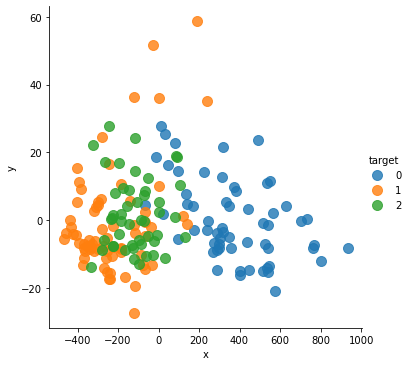

In [15]:
# 회귀선 출력 plot
sb.lmplot(x='x', y='y', data=pcadf_wine, fit_reg=False, 
          hue='target', scatter_kws={'s':100})
plt.plot()

In [10]:
pcaf_wine[0]

array([318.56297929,  21.49213073])

In [11]:
# 원래값으로 복원
model_wine.inverse_transform([[ 3.18562979e+02,  2.14921307e+01]] )

array([[1.35550621e+01, 2.16571712e+00, 2.52733485e+00, 1.85753157e+01,
        1.26911695e+02, 2.62930473e+00, 2.52743531e+00, 2.93532441e-01,
        1.88978551e+00, 6.12397031e+00, 9.95653303e-01, 2.76112769e+00,
        1.06501783e+03]])